In [5]:
import sys
sys.path.insert(0, "..")

In [6]:
import numpy as np
from matplotlib import pyplot as plt

from module.base.network import Network
from module.simulation.meanfield import MeanField
import module.components.CONST as CONST

## Single Electron Transistor

We calculate the output current for a one-nanoparticle network under varied input voltages.

### Variable Input Voltage

In [7]:
net = Network(1,1,1,[[0,0,0],[0,0,0]])
mf = MeanField(net)

In [8]:
Us = np.linspace(-0.1, 0.1, 100)
Is = np.zeros(100)
Is_direct = np.zeros(100)

for i, U in enumerate(Us):
    net.set_voltage_config([U, 0], 0)
    state = mf.numeric_integration_solve()
    Is[i] = -mf.calc_expected_electrode_current(state, 1) * CONST.electron_charge
    Is_direct[i] = -mf.antisymmetric_tunnel_rate_electrode(state, 1) * CONST.electron_charge

In [9]:
# KMC data
_, U_data, I_data = np.loadtxt("../data/set_0.0.csv", unpack = True, skiprows = 1, delimiter = ",")
I_data = I_data / 1000 * CONST.electron_charge

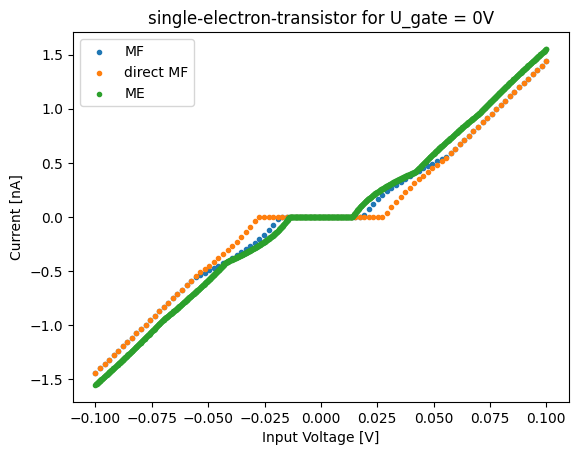

In [10]:
plt.scatter(Us, Is, marker = ".", label = "MF")
plt.scatter(Us, Is_direct, marker = ".", label = "direct MF")
plt.scatter(U_data, I_data, marker = ".", label = "ME")
plt.xlabel("Input Voltage [V]")
plt.ylabel("Current [nA]")
plt.title("single-electron-transistor for U_gate = 0V")
plt.legend()

### Variable Gate Voltage

In [11]:
net = Network(1,1,1,[[0,0,0],[0,0,0]])
mf = MeanField(net)

In [13]:
Us = np.linspace(-0.02, 0.02, 80)
Is1 = np.zeros(80)
Is2 = np.zeros(80)
Is3 = np.zeros(80)

for i, U in enumerate(Us):
    net.set_voltage_config([0.01, 0], U)
    Is1[i] = -mf.calc_expected_electrode_current(mf.numeric_integration_solve(), 1) * CONST.electron_charge

    net.set_voltage_config([0.02, 0], U)
    Is2[i] = -mf.calc_expected_electrode_current(mf.numeric_integration_solve(), 1) * CONST.electron_charge

    net.set_voltage_config([0.03, 0], U)
    Is3[i] = -mf.calc_expected_electrode_current(mf.numeric_integration_solve(), 1) * CONST.electron_charge

Text(0, 0.5, 'I_out [nA]')

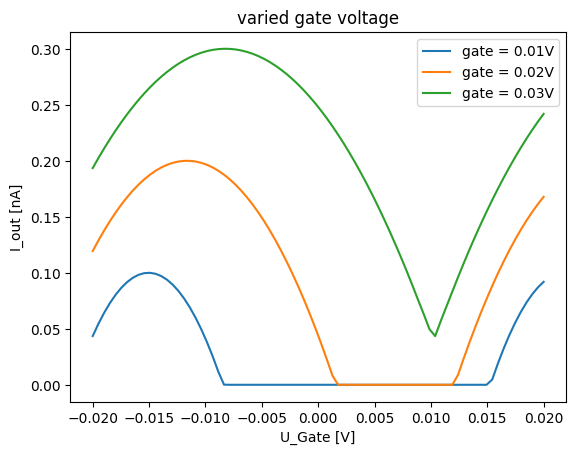

In [14]:
plt.plot(Us, Is1, label = "gate = 0.01V")
plt.plot(Us, Is2, label = "gate = 0.02V")
plt.plot(Us, Is3, label = "gate = 0.03V")
plt.title("varied gate voltage")
plt.legend()
plt.xlabel("U_Gate [V]")
plt.ylabel("I_out [nA]")